In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

### Compute some statistics about species data

In [3]:
## get species text length
speciesFiles = os.listdir("./WikiSpeciesHabitats/species/")
binomialName = []
speciesKey = []
textLenght = []
for file in speciesFiles:
    with open("./WikiSpeciesHabitats/species/" + file, "r") as fp:
        fileContent = json.load(fp)
        binomialName.append(fileContent["binomialName"])
        speciesKey.append(fileContent["speciesKey"])
        textLenght.append(fileContent["textLength"])
speciesData = pd.DataFrame(list(zip(speciesKey, binomialName, textLenght)),columns =["speciesKey", "binomialName", "textLenght"])

In [4]:
## get species taxonomy
df = pd.read_json("./WikiSpeciesHabitats/speciesData.json", orient="records")
df = df.drop("scientificName", axis=1).drop_duplicates()
speciesData = df.join(speciesData.set_index("speciesKey"), on="speciesKey", how="inner")
df = None

In [5]:
## get species number of occurences
df = pd.read_json("./processed_data/speciesHabitatsRecords.json", orient="records").drop_duplicates()
df = pd.DataFrame(df["speciesKey"].value_counts())
df.columns=["observationsCount"]
speciesData = speciesData.join(df, on="speciesKey", how="inner")
df = None

In [6]:
speciesData.head()

,kingdom,phylum,class,order,family,genus,species,speciesKey,binomialName,textLenght,observationsCount
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796,1858
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580,1756
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823,1639
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238,262
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787,190


In [10]:
## Overall text length and obsercations count distributions
speciesData.describe()

,speciesKey,textLenght,observationsCount
count,5.954000e+03,5954.000000,5954.000000
mean,4.084214e+06,4208.726067,57.253275
std,2.298324e+06,7914.628602,122.654088
min,1.012292e+06,79.000000,1.000000
25%,2.494345e+06,723.250000,3.000000
50%,3.070226e+06,2051.000000,14.000000
75%,5.356106e+06,4284.000000,58.750000
max,1.215520e+07,184067.000000,2908.000000


In [11]:
## Number of documented species per kingdom
pd.DataFrame(speciesData["kingdom"].value_counts())

,kingdom
Animalia,2641
Plantae,2304
Fungi,904
Bacteria,89
Chromista,9
Protozoa,7


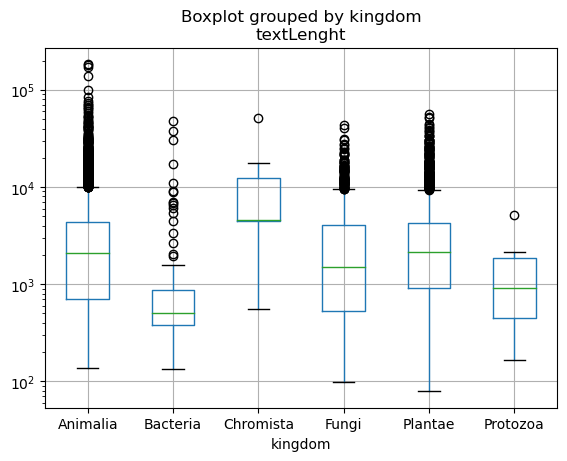

In [12]:
## Textlenght by kingom
ax = speciesData.boxplot(column="textLenght", by="kingdom")
ax.set_yscale("log")

In [13]:
## Total number of observations by kingdom
pd.DataFrame(speciesData.groupby("kingdom")["observationsCount"].sum())

,observationsCount
kingdom,
Animalia,121823
Bacteria,94
Chromista,13
Fungi,9701
Plantae,209227
Protozoa,28


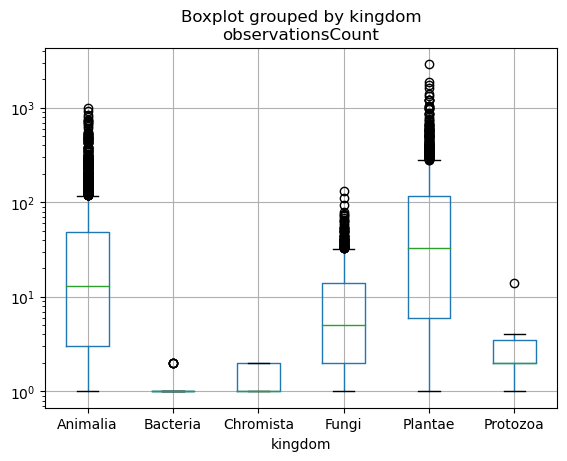

In [14]:
## Species number of observations distribution by kingdom
ax = speciesData.boxplot(column="observationsCount", by="kingdom")
ax.set_yscale("log")

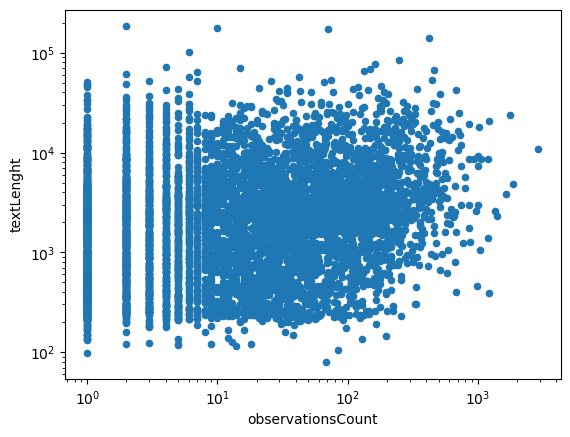

In [15]:
## Text length to observation count relation
ax = speciesData.plot.scatter(x="observationsCount", y="textLenght")
ax.set_yscale("log")
ax.set_xscale("log")

### Compute statistics about zones data

In [16]:
speciesHabitatsRecords = pd.read_json("./processed_data/speciesHabitatsRecords.json", orient="records")
speciesHabitatsRecords.head(10)

,zoneID,TypoCH_NUM,speciesKey,shapeArea,canton
0,91856,92,5389029,41303.24955,VD
1,91856,92,5389029,41303.24955,VD
2,91856,92,5389029,41303.24955,VD
3,91856,92,5389029,41303.24955,VD
4,91856,92,5389029,41303.24955,VD
5,91856,92,5389029,41303.24955,VD
6,91856,92,5389029,41303.24955,VD
7,91856,92,5389029,41303.24955,VD
8,91856,92,5389029,41303.24955,VD
9,91856,92,5389029,41303.24955,VD


In [17]:
speciesHabitatsRecords.describe()

,zoneID,TypoCH_NUM,speciesKey,shapeArea
count,1.940239e+06,1.940239e+06,1.940239e+06,1.940239e+06
mean,5.830941e+04,4.285501e+02,4.257394e+06,1.538915e+06
std,3.233665e+04,3.558740e+02,2.194054e+06,1.306477e+07
min,9.000000e+00,2.000000e+00,1.012292e+06,2.675876e+01
25%,2.671700e+04,6.200000e+01,2.706435e+06,1.288080e+05
50%,6.052300e+04,4.530000e+02,3.137498e+06,3.450958e+05
75%,9.131800e+04,6.610000e+02,5.376139e+06,9.873128e+05
max,1.079740e+05,5.300000e+03,1.215520e+07,3.240591e+08


In [18]:
## Number of species Keys per shape
zones = speciesHabitatsRecords.drop_duplicates().groupby(["zoneID","TypoCH_NUM","shapeArea"])["speciesKey"].count().reset_index()
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zoneID,TypoCH_NUM,shapeArea,speciesKey
count,29703.000000,29703.000000,2.970300e+04,29703.000000
mean,53315.370804,461.095378,9.626642e+05,11.476484
std,30988.159672,680.414523,1.054880e+07,78.563401
min,9.000000,2.000000,2.675876e+01,1.000000
10%,10571.800000,12.000000,5.954737e+03,1.000000
20%,23120.200000,41.000000,1.398235e+04,1.000000
30%,29646.600000,66.000000,2.636081e+04,1.000000
40%,39737.800000,322.000000,4.819078e+04,2.000000
50%,53427.000000,435.000000,8.506134e+04,2.000000
60%,65016.400000,454.000000,1.447255e+05,3.000000


In [19]:
## Available text lenght per zone and unique species number
subset = speciesData[["speciesKey", "textLenght"]].set_index("speciesKey")
zones = speciesHabitatsRecords.drop_duplicates().join(subset, on="speciesKey", how="inner")
zones = zones.groupby(["zoneID","TypoCH_NUM","shapeArea","canton"]).agg({"speciesKey":"count","textLenght":"sum"}).reset_index()
zones = zones.rename(columns={"speciesKey":"speciesCount"})
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zoneID,TypoCH_NUM,shapeArea,speciesCount,textLenght
count,29703.000000,29703.000000,2.970300e+04,29703.000000,2.970300e+04
mean,53315.370804,461.095378,9.626642e+05,11.476484,7.224567e+04
std,30988.159672,680.414523,1.054880e+07,78.563401,3.822384e+05
min,9.000000,2.000000,2.675876e+01,1.000000,1.050000e+02
10%,10571.800000,12.000000,5.954737e+03,1.000000,2.235200e+03
20%,23120.200000,41.000000,1.398235e+04,1.000000,3.818000e+03
30%,29646.600000,66.000000,2.636081e+04,1.000000,6.410000e+03
40%,39737.800000,322.000000,4.819078e+04,2.000000,9.901000e+03
50%,53427.000000,435.000000,8.506134e+04,2.000000,1.445100e+04
60%,65016.400000,454.000000,1.447255e+05,3.000000,2.084600e+04


In [20]:
## Visualize outliers
zones.sort_values(by="speciesCount", ascending=False).head(10)

,zoneID,TypoCH_NUM,shapeArea,canton,speciesCount,textLenght
4674,19605,451,3.140673e+04,VS,1995,8533248
18159,65609,820,6.992971e+05,VS,1972,8536524
21653,77107,820,6.967248e+05,VS,1837,8026282
7155,25697,81,1.493497e+05,VS,1735,8112271
19937,72887,820,1.905362e+05,VS,1728,7550488
6036,23328,634,1.020260e+06,VS,1707,7889285
4180,18534,34,8.018861e+04,VS,1692,7397207
18042,65423,932,2.628990e+06,VS,1673,7704618
20099,73141,643,1.883951e+05,VS,1613,6998940
5955,23151,816,2.406491e+06,VS,1596,7334192


In [21]:
high_IDs = zones[zones["speciesCount"]>100]["zoneID"]
high_IDs

38          144
83          259
312         864
427        1179
523        1508
          ...  
29060    104580
29205    105259
29417    106221
29505    107100
29528    107235
Name: zoneID, Length: 290, dtype: int64

In [22]:
## Number of zones per canton (roughly 80% vs 20%)
zones.canton.value_counts()

VS    24505
VD     5198
Name: canton, dtype: int64

In [23]:
## Number of occurence of habitats
habitatsData = pd.read_json("./WikiSpeciesHabitats/habitatsData.json", orient="records")
subset = pd.DataFrame(zones.TypoCH_NUM.value_counts())
subset.columns = ["occurencesCount"]
habitatsData = habitatsData.join(subset, on="TypoCH_NUM", how="left")
habitatsData = habitatsData.fillna(0)
habitatsData.head(10)

,TypoCH_NUM,TypoCH_DE,TypoCH_FR,TypoCH_IT,TypoCH_Sci,Class,Group_,Type,Source,occurencesCount
0,1,1 Gewässer,1 Eaux libres,1 Ambienti acquatici,0,1,1,1,1,0.0
1,11,1.1 Stehende Gewässer,1.1 Eaux calmes,1.1 Acque ferme,0,1,11,11,1,266.0
2,12,1.2 Fliessgewässer,1.2 Eaux courantes,1.2 Acque correnti,0,1,12,12,1,735.0
3,2,2 Ufer und der Feuchtgebiete,2 Rivages et lieux humides,2 Rive e luoghi umidi,0,2,2,2,1,21.0
4,21,2.1 Ufer mit Vegetation,2.1 Rivages avec végétation,2.1 Rive con copertura vegetale,0,2,21,21,1,158.0
5,211,2.1.1 Moortümpelgesellschaft,2.1.1 Dépression inondée à utriculaires,2.1.1 Depressioni allagate con Erba-vescica,Sphagno-Utricularion,2,21,211,1,0.0
6,212,2.1.2 Röhricht,2.1.2 Roselière,2.1.2 Canneti,0,2,21,212,2,0.0
7,2121,2.1.2.1 Stillwasser-Röhricht,2.1.2.1 Roselière lacustre,2.1.2.1 Canneti lacustri,Phragmition,2,21,212,2,0.0
8,2122,2.1.2.2 Flussufer- und Landröhricht,2.1.2.2 Roselière terrestre,"2.1.2.2 Canneti terrestri, ripariali",Phalaridion,2,21,212,2,18.0
9,22,2.2 Flachmoore,2.2 Bas-marais,2.2 Paludi (torbiere basse),0,2,22,22,2,0.0


In [24]:
## At the TypoCH_NUM level
habitatsData.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,TypoCH_NUM,Class,Group_,Type,Source,occurencesCount
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,557.794872,5.153846,51.474359,400.128205,3.724359,190.403846
std,888.226669,2.188397,23.863712,293.086483,2.948097,330.856558
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10%,28.000000,2.000000,21.500000,28.000000,1.000000,0.000000
20%,60.000000,3.000000,25.000000,60.000000,2.000000,0.000000
30%,211.500000,4.000000,42.000000,152.500000,2.000000,0.000000
40%,401.000000,5.000000,45.000000,250.000000,2.000000,0.000000
50%,451.500000,5.000000,53.000000,432.500000,3.000000,6.000000
60%,543.000000,6.000000,61.000000,535.000000,3.000000,61.000000


In [25]:
## At the Type level
pd.DataFrame(habitatsData.groupby("Type")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Type,occurencesCount
count,148.000000,148.000000
mean,403.297297,200.695946
std,296.006997,336.665656
min,1.000000,0.000000
10%,24.700000,0.000000
20%,53.400000,0.000000
30%,93.100000,0.000000
40%,251.800000,0.000000
50%,434.500000,16.000000
60%,537.200000,83.200000


In [26]:
## At the Group level
pd.DataFrame(habitatsData.groupby("Group_")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Group_,occurencesCount
count,46.000000,46.000000
mean,42.195652,645.717391
std,27.922607,882.786413
min,1.000000,0.000000
10%,5.500000,0.000000
20%,11.000000,11.000000
30%,23.500000,88.500000
40%,33.000000,243.000000
50%,42.500000,313.500000
60%,51.000000,458.000000


In [27]:
## At the Class level
pd.DataFrame(habitatsData.groupby("Class")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Class,occurencesCount
count,9.000000,9.000000
mean,5.000000,3300.333333
std,2.738613,3274.922251
min,1.000000,550.000000
10%,1.800000,871.600000
20%,2.600000,961.600000
30%,3.400000,981.200000
40%,4.200000,1119.600000
50%,5.000000,1594.000000
60%,5.800000,2831.600000


### See how species distribution differ in different habitats